In [ ]:
# first we install the required packages
!pip install flask-ngrok

- Colab is the Python environment and it runs the functions and whatever we want.
- flask converts our Python code to web application.
- ngrok connects our local web application to the internet so the people can see our web application.





In [ ]:
# I am importing the packages that I want to use
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, Response
# configure the Flask and tell the Flask it will use the ngrok
# what does ngrok do? It connects my local web app to internet so people can see my web app
app = Flask(__name__)
run_with_ngrok(app)

# read data from google drive
from google.colab import drive
import pandas as pd
drive.mount('/content/drive', force_remount = True)
MyDataFrame = pd.read_csv("/content/drive/My Drive/cstr/Seattle_Short.csv")

# when someone comes to my home page please show my data to the user
@app.route("/")
def home():
  return Response(MyDataFrame.to_json(orient="records"), mimetype='application/json')
# keep the web service always running and serving
app.run()

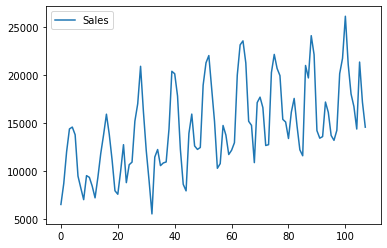

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [ ]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
# we tell pandas to download the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

df = read_csv(path, header=0)
# we ask pandas to visualize dataset
df.plot()
pyplot.show()
# we ask pandas to print the first data rows
df.head()

In [ ]:
df.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [ ]:
list(df)
# by default, the titles are: Month and Sales

['Month', 'Sales']

Let us say that we are in july 1967 and we want to know if we invest in the car dealership buisiness then we will make money or lose money on Aug. so this is the question.

And we imagine/presume that have data of car sales from 1960 to 1967 July.

forecasting of data is very important for us; because it foretells if we will lose money or make money!!!



In [ ]:
# at first we import the required packages

import fbprophet
from fbprophet import Prophet
import numpy as np
from fbprophet.plot import add_changepoints_to_plot
from pandas import read_csv

In [ ]:
# in the second step, we make a pandas data frame
# the df will have only two columns
# the name of the first column is ds
# the name of the second column is y

# this code changes the title of the df columns to the following

df.columns = ['ds', 'y']
df.head()

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [ ]:
df.head(90)

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
85,1967-02,11608
86,1967-03,20985
87,1967-04,19692
88,1967-05,24081


In [ ]:
# the third step is cut data and get the parts we like to train our model to learn and the 
#secons part of dataset will be forecasted and we will compare the data of dataset with predicted values
# to see if our forecasting algorithm works good or bad!

df_new = df.head(90)
df_new

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
85,1967-02,11608
86,1967-03,20985
87,1967-04,19692
88,1967-05,24081


In [ ]:
# in the fourth step, we make a Prophet object and then we ask the Prophet to learn the training data
model = Prophet()
model.fit(df_new)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# this code made the periods of time to be predicted!
future = model.make_future_dataframe(periods=6,freq='M')
future.tail(15)

,ds
81,1966-10-01
82,1966-11-01
83,1966-12-01
84,1967-01-01
85,1967-02-01
86,1967-03-01
87,1967-04-01
88,1967-05-01
89,1967-06-01
90,1967-06-30


In [ ]:
forecast = model.predict(future)
forecast

In [ ]:
forecast.shape


(96, 16)

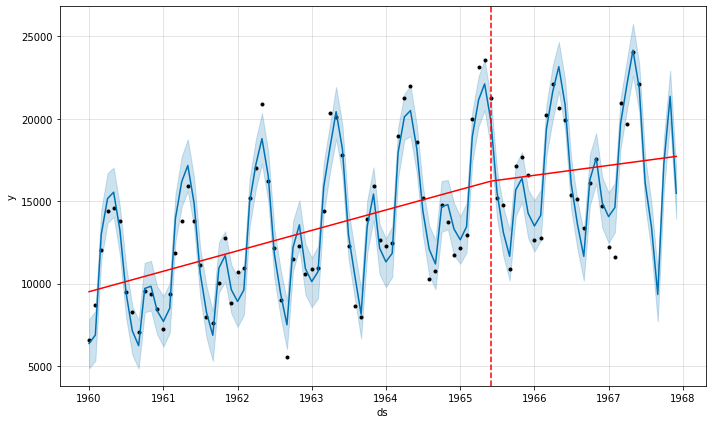

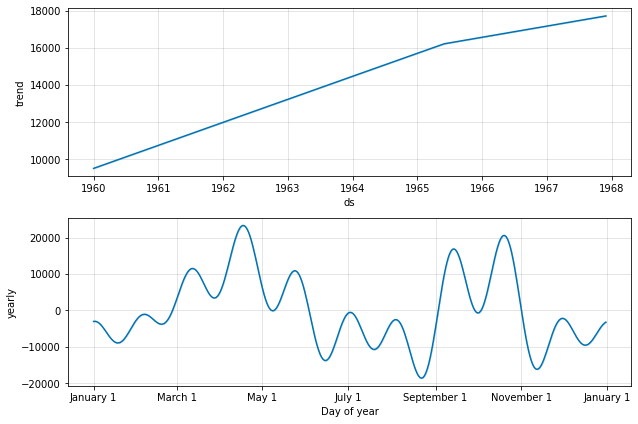

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
from matplotlib import pyplot as plt
plt.show()
fig2 = model.plot_components(forecast)
plt.show()
